In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('E:\stackoverflow_full.csv')
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


# Data Preprocessing Part - I

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [4]:
df.select_dtypes(include='object').nunique()

Age                   2
Accessibility         2
EdLevel               5
Gender                3
MentalHealth          2
MainBranch            2
Country             172
HaveWorkedWith    69980
dtype: int64

# Segment Country into smaller unique value

In [5]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [6]:
# Define a function to segment countries
def segment_country(country):
    if country in ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
                   'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
                   'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro',
                   'Netherlands', 'North Macedonia (The former Yugoslav Republic of Macedonia)', 'Norway', 'Poland', 'Portugal',
                   'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
                   'United Kingdom of Great Britain and Northern Ireland']:
        return 'Europe'
    elif country in ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
                     'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay',
                     'Venezuela, Bolivarian Republic of...']:
        return 'South America'
    elif country in ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China',
                     'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Iraq', 'Israel', 'Japan',
                     'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Malaysia',
                     'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar',
                     'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste',
                     'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']:
        return 'Asia'
    elif country in ['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Vanuatu']:
        return 'Oceania'
    else:
        return 'Others'

# Apply the segmentation function to create a new column
df['region'] = df['Country'].apply(segment_country)


<Axes: >

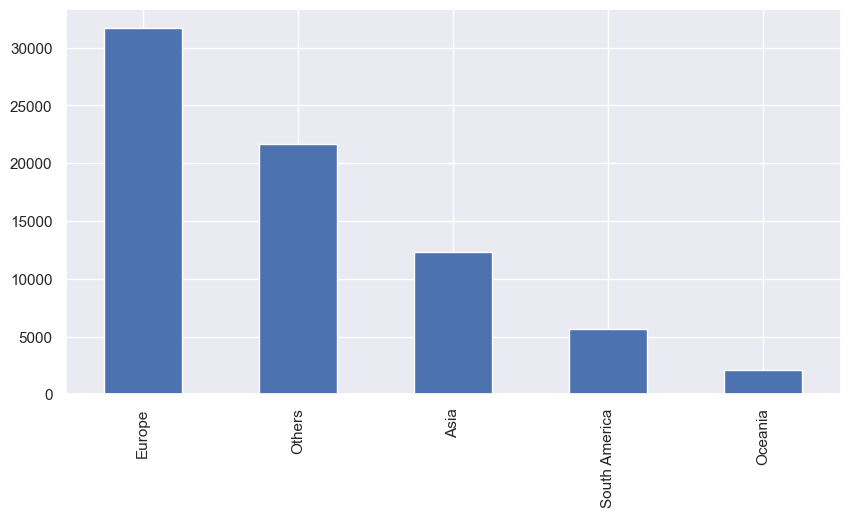

In [7]:
plt.figure(figsize=(10, 5))
df['region'].value_counts().plot(kind='bar')

In [8]:
# Remove HaveWorkedWith column because we have ComputerSkills column and the amount of
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [9]:
# Replace 1 with 'yes' and 0 with 'no’' in the 'fraud' column and other categorical colu
df['Employment'] = df['Employment'].replace({0: 'no', 1: 'yes'})
df['Employed'] = df['Employed'].replace({0: 'no', 1: 'yes'})


In [10]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,region
0,<35,No,Master,yes,Man,No,Dev,7,4,Sweden,51552.0,4,no,Europe
1,<35,No,Undergraduate,yes,Man,No,Dev,12,5,Spain,46482.0,12,yes,Europe
2,<35,No,Master,yes,Man,No,Dev,15,6,Germany,77290.0,7,no,Europe
3,<35,No,Undergraduate,yes,Man,No,Dev,9,6,Canada,46135.0,13,no,Others
4,>35,No,PhD,no,Man,No,NotDev,40,30,Singapore,160932.0,2,no,Asia


# Exploratory Data Analysis

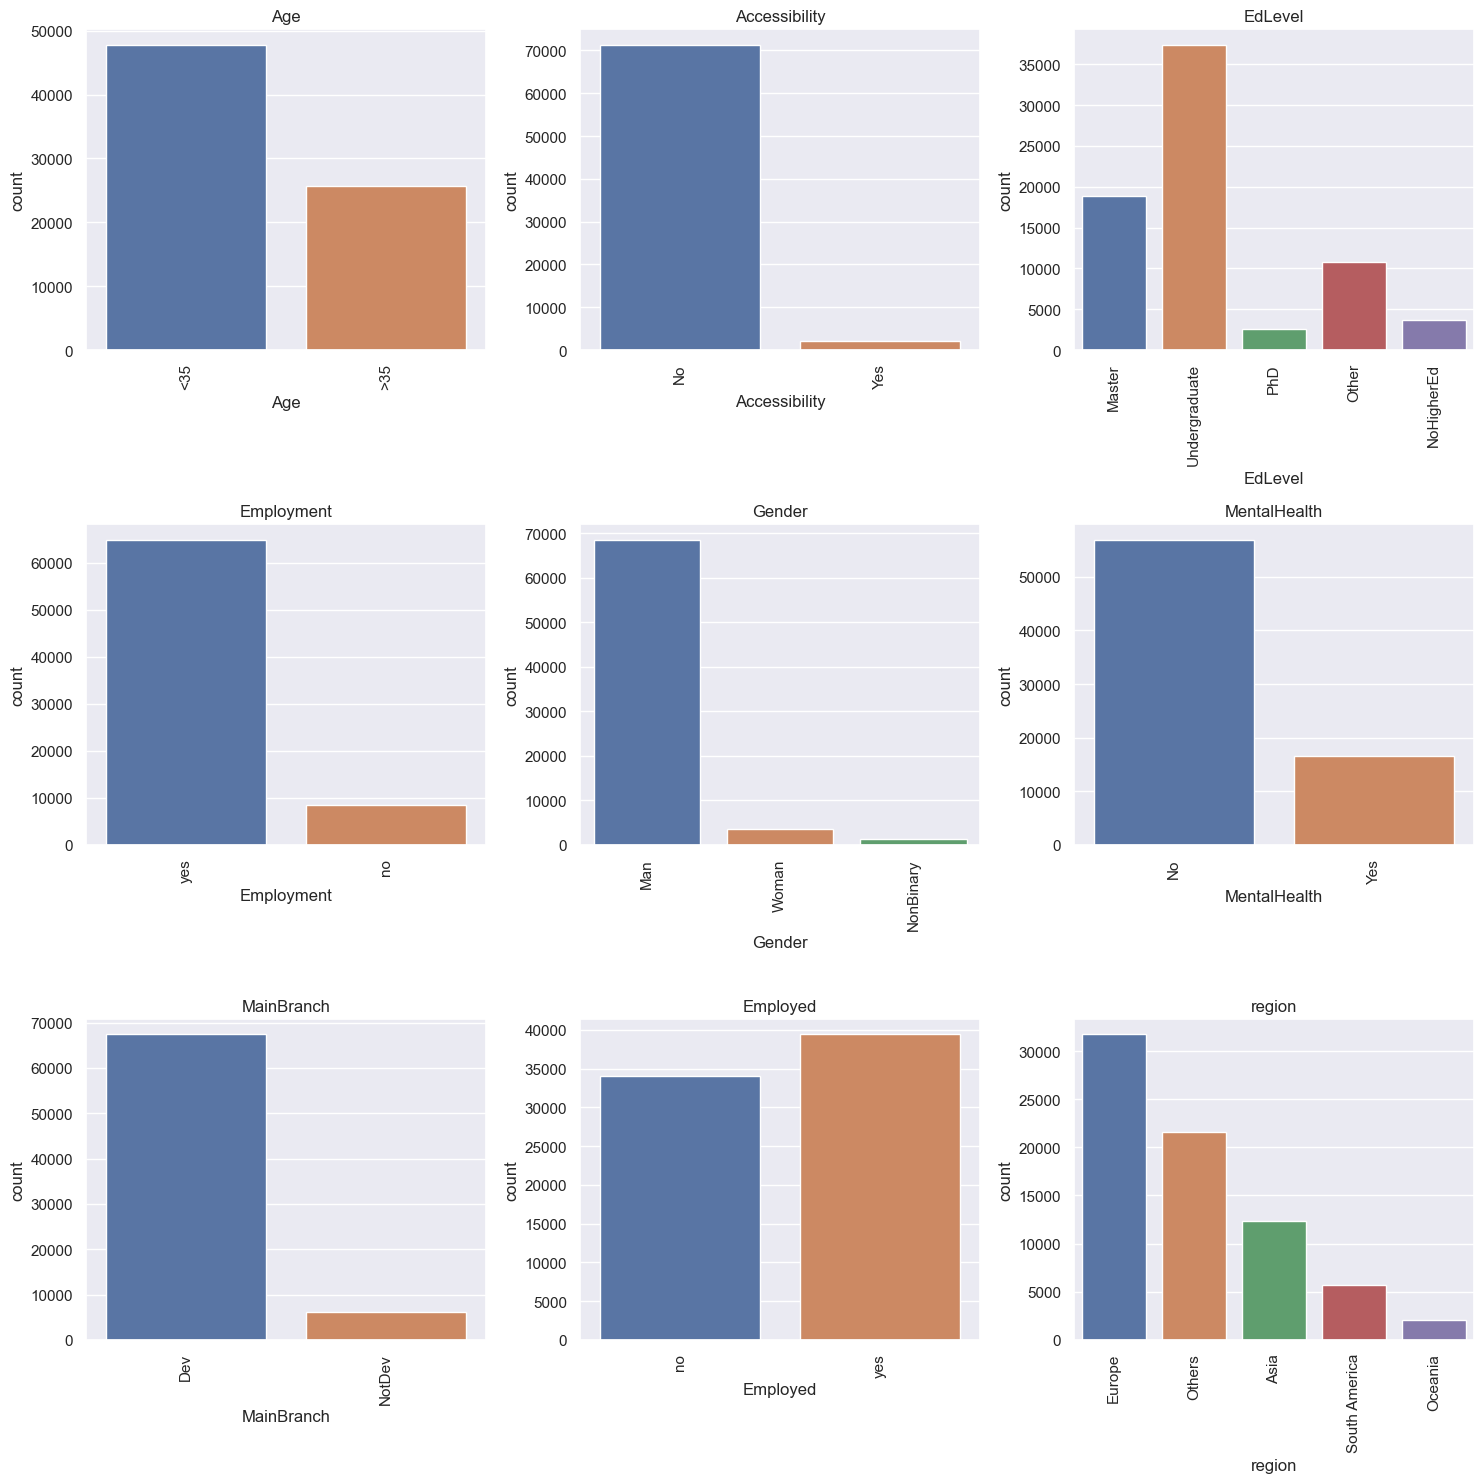

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = [var for var in df.select_dtypes(include='object').columns if var != 'Country']

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis="x", rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


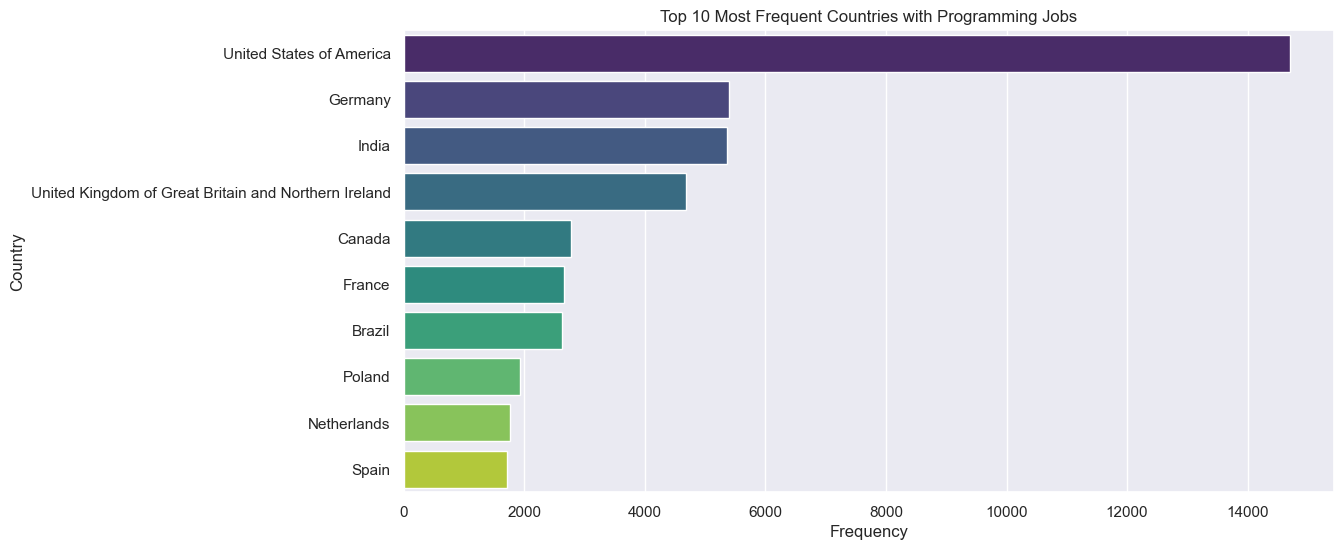

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent countries
top_countries = df['Country'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")

# Set labels and title
plt.xlabel('Frequency')  # Corrected the quotation marks and label
plt.ylabel('Country')    # Corrected the quotation marks and label
plt.title('Top 10 Most Frequent Countries with Programming Jobs')  # Corrected the title

# Show plot
plt.show()


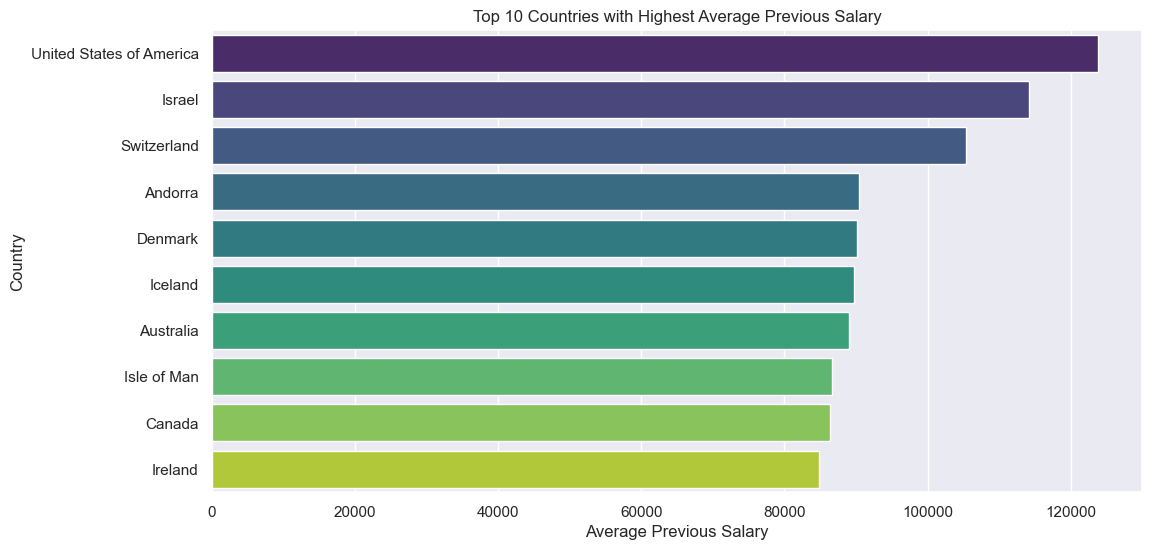

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Country' and calculate the average 'PreviousSalary' for each country
average_salary_by_country = df.groupby('Country')['PreviousSalary'].mean().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_salary_by_country.values, y=average_salary_by_country.index, palette="viridis")

# Set labels and title
plt.xlabel('Average Previous Salary')
plt.ylabel('Country')  # Corrected the quotation marks and label
plt.title('Top 10 Countries with Highest Average Previous Salary')  # Corrected the title

# Show plot
plt.show()


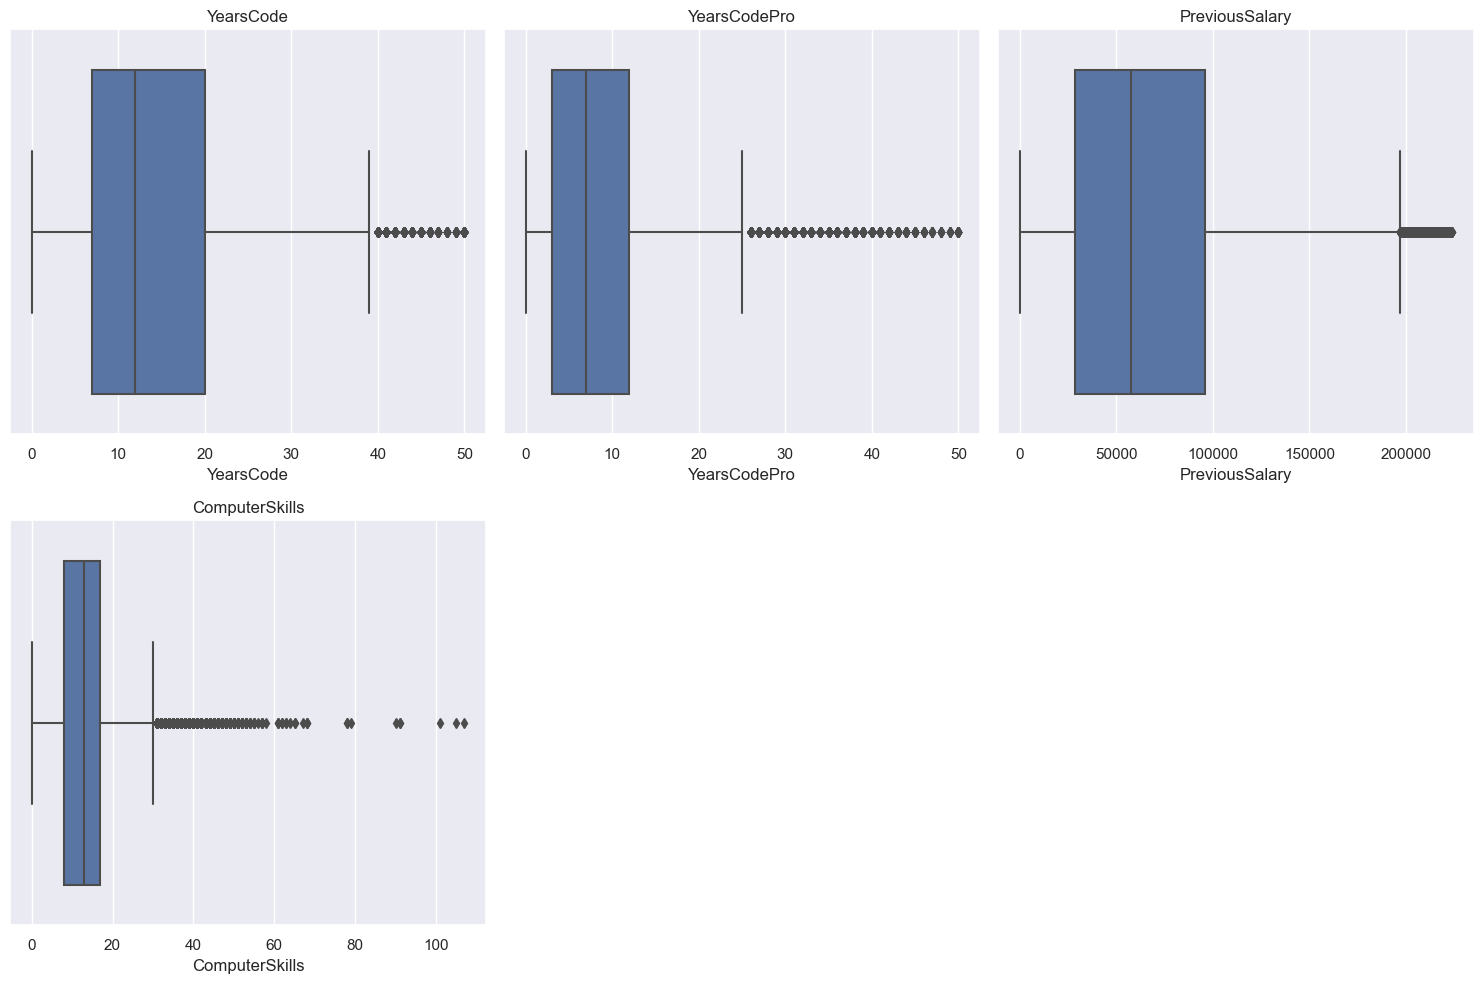

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'int' or 'float', excluding the specified columns
num_vars = df.select_dtypes(include=["int", "float"]).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


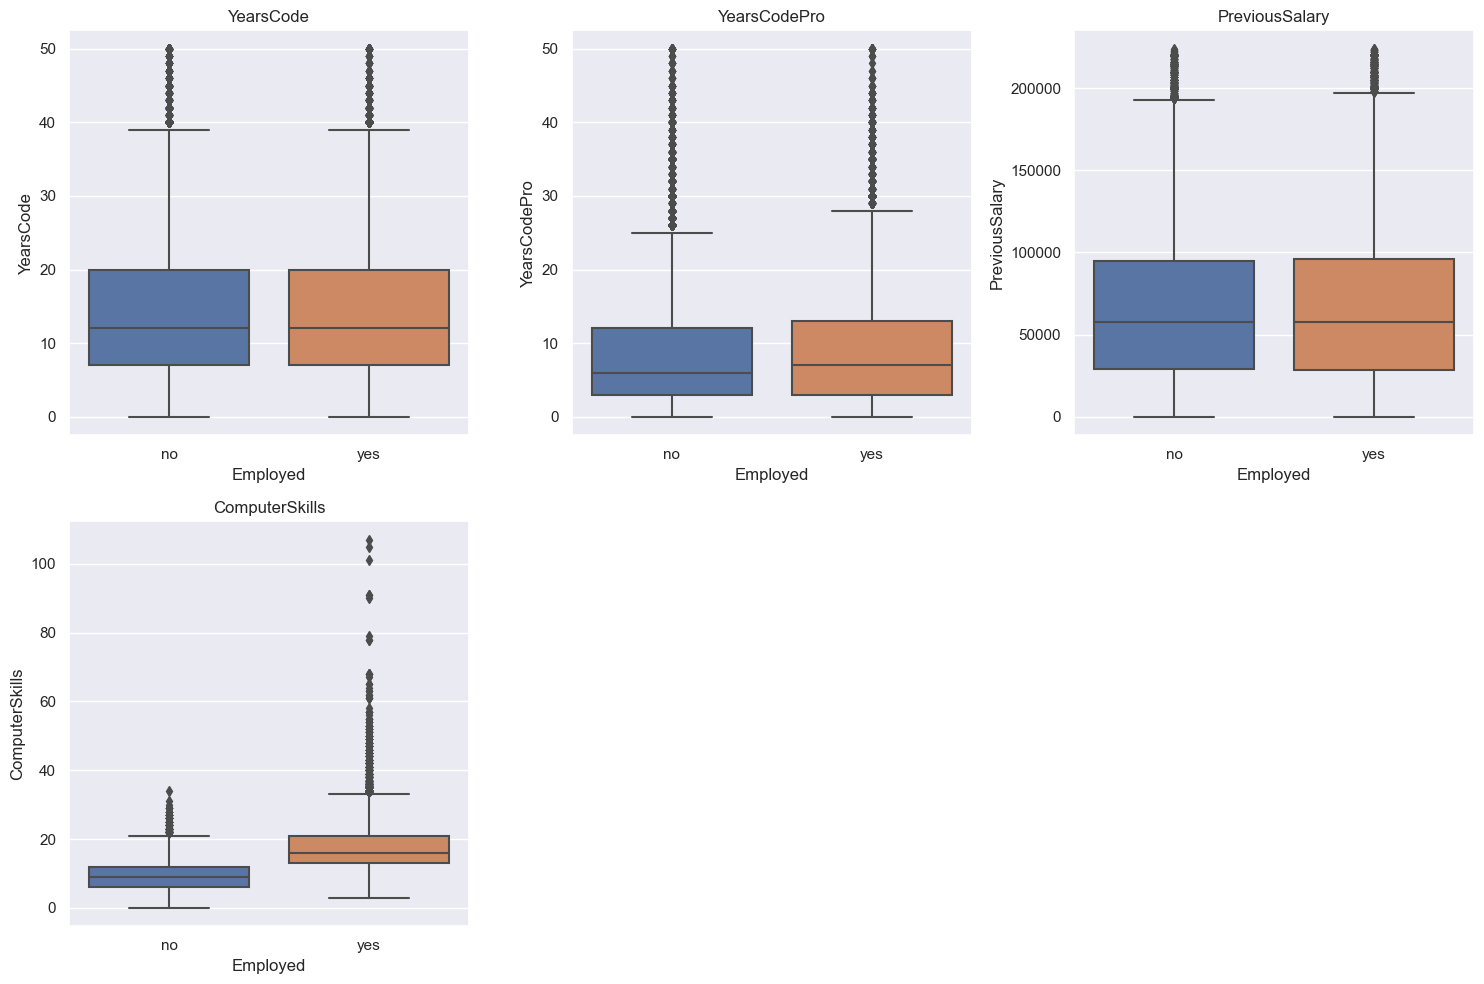

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='Employed'
for i, var in enumerate(int_vars):
    sns.boxplot(x='Employed', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


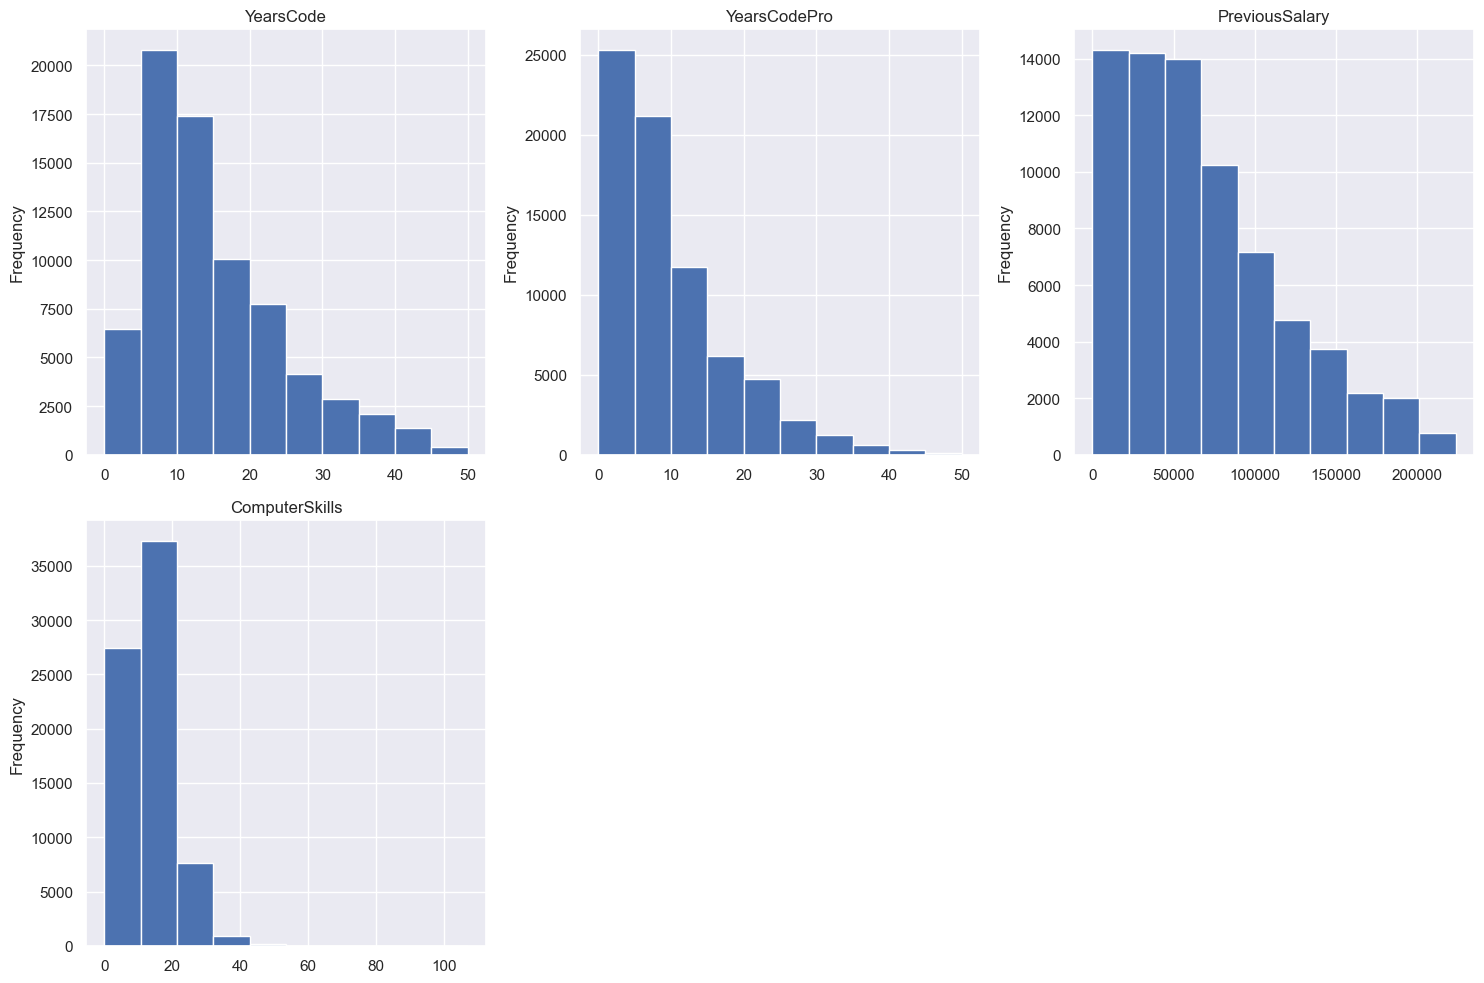

In [17]:
import matplotlib.pyplot as plt

# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


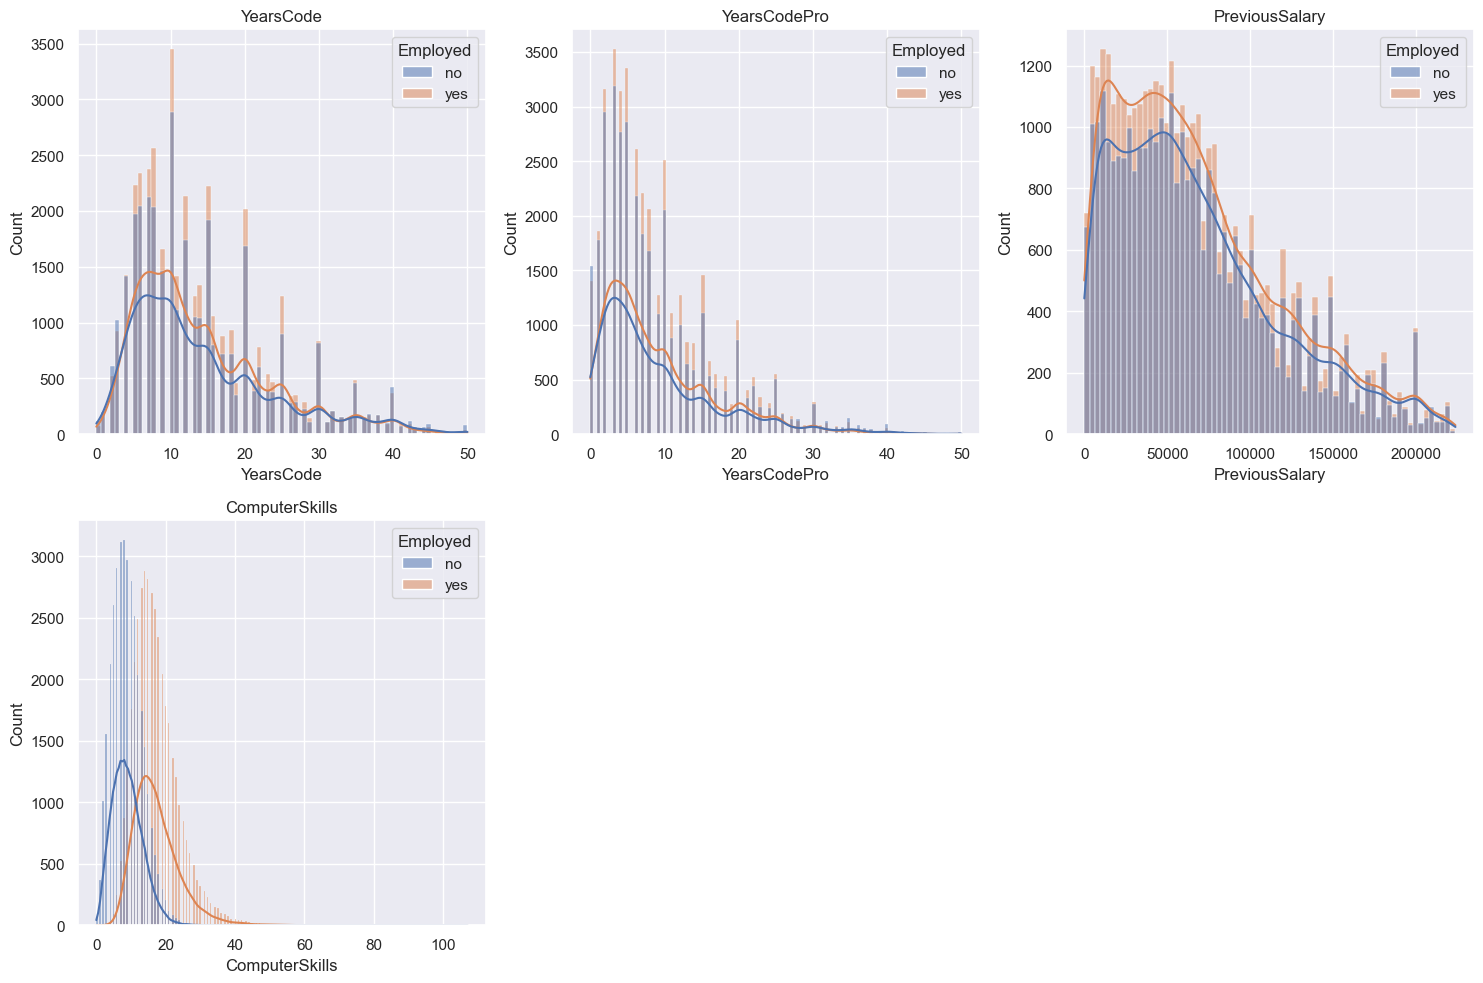

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'int' or 'float'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a histogram for each numeric variable with hue='Employed'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='Employed', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


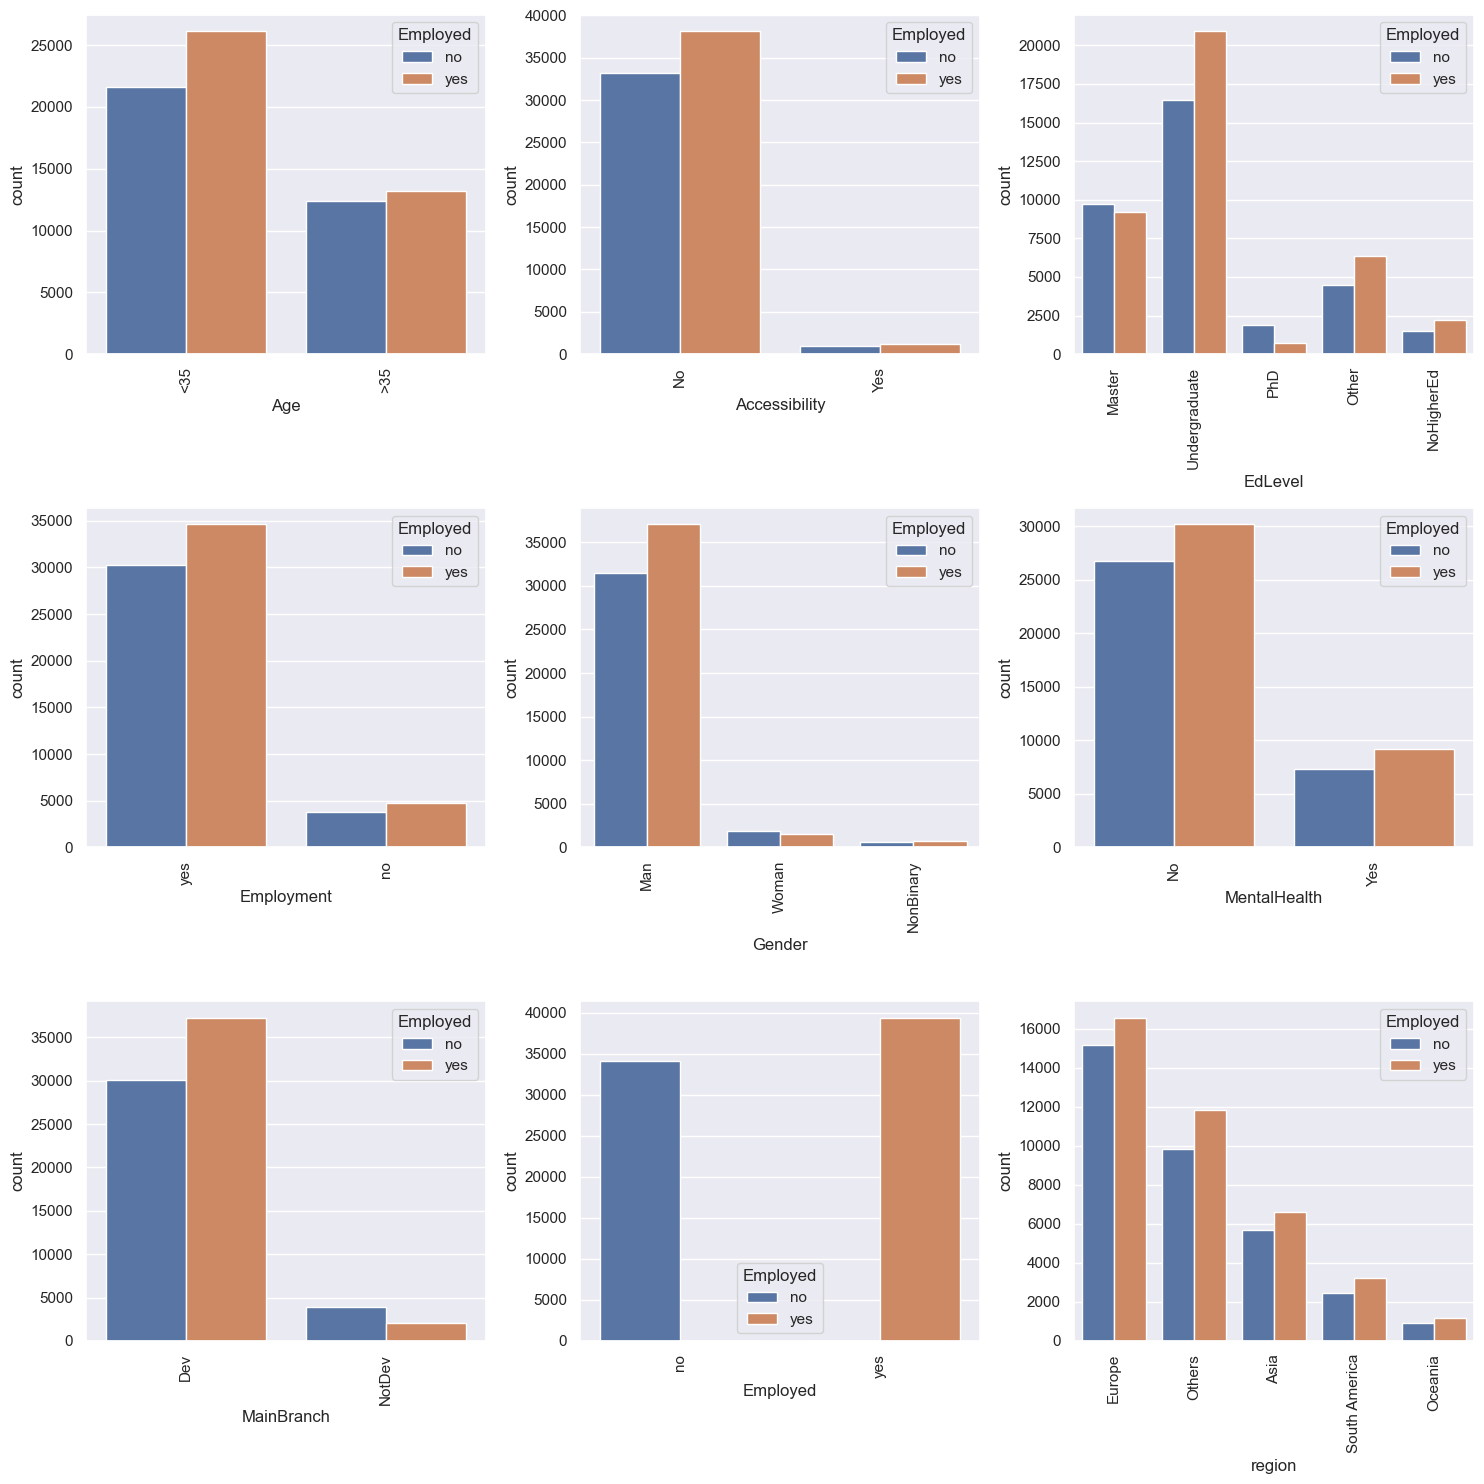

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' from the list if it exists in cat_vars
if 'Country' in cat_vars:
    cat_vars.remove('Country')  # Corrected the variable name

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Employed', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):  # Corrected the brackets
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


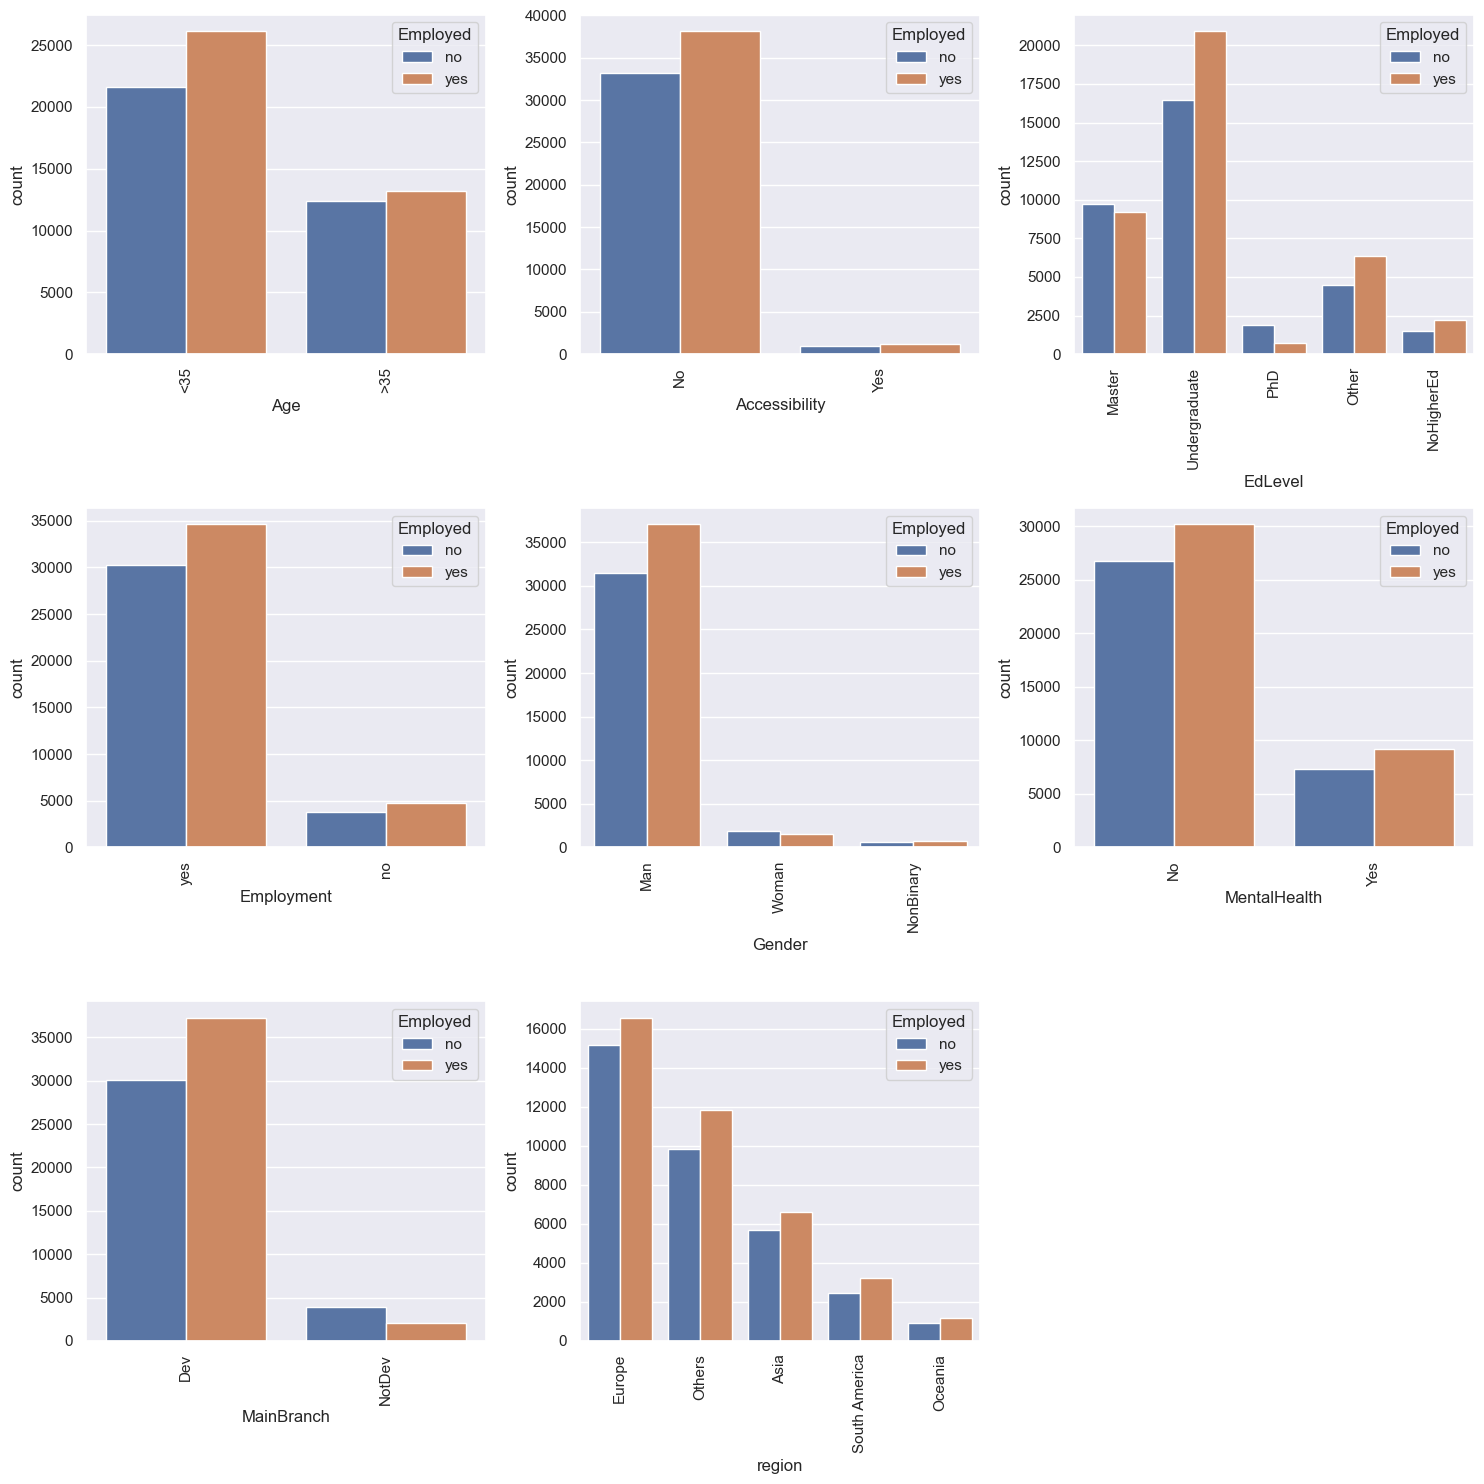

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' and 'Employed' from the list if they exist in cat_vars
exclude_columns = ['Country', 'Employed']
cat_vars = [var for var in cat_vars if var not in exclude_columns]

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Employed', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):  # Corrected the brackets
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


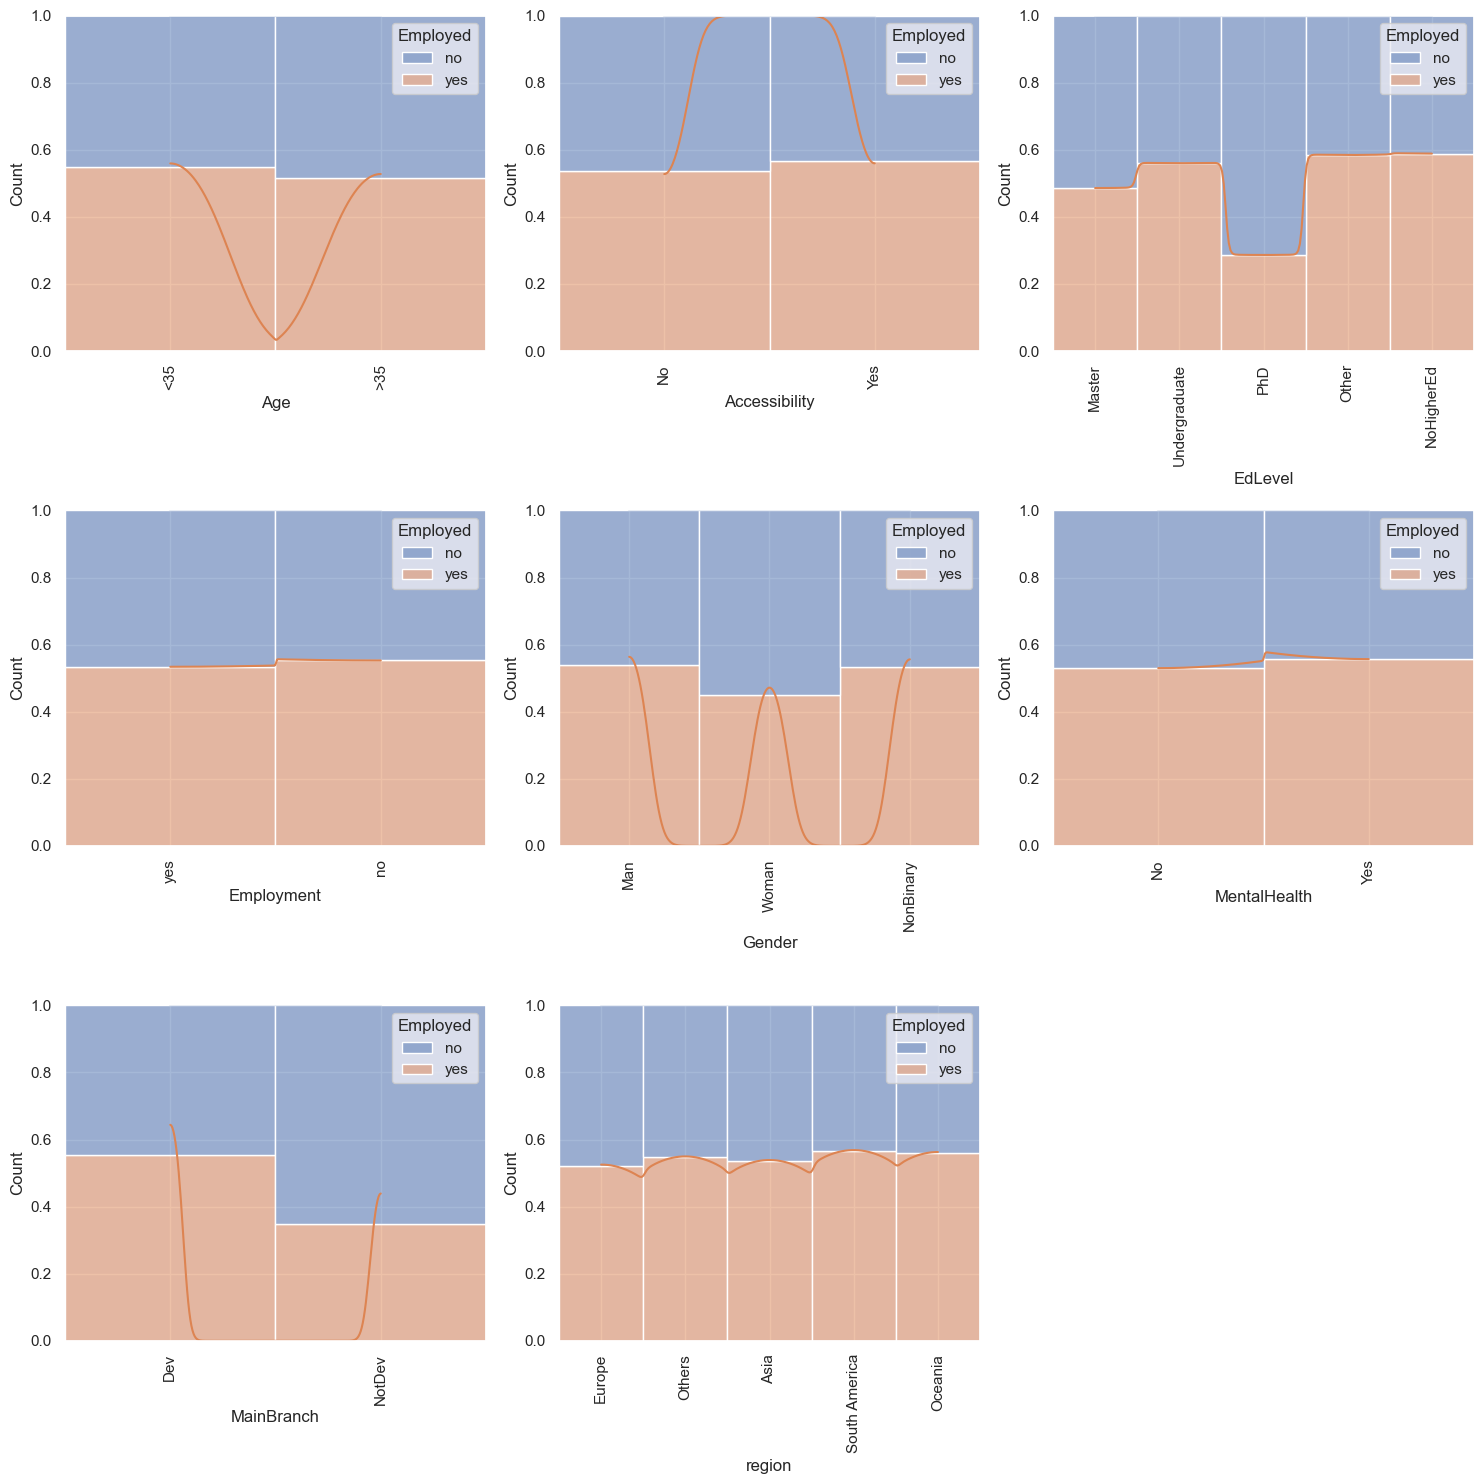

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' and 'Employed' from the list if they exist in cat_vars
exclude_columns = ['Country', 'Employed','Employed_num']
cat_vars = [var for var in cat_vars if var not in exclude_columns]

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Create a density plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable

    # Set x-tick positions explicitly
    tick_positions = range(len(filtered_df[var].unique()))
    axs[i].set_xticks(tick_positions)

    axs[i].set_xticklabels(filtered_df[var].unique(), rotation=90)  # Set x-tick Labels

    sns.histplot(x=var, hue='Employed', data=filtered_df, ax=axs[i], multiple="fill", kde=True)
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


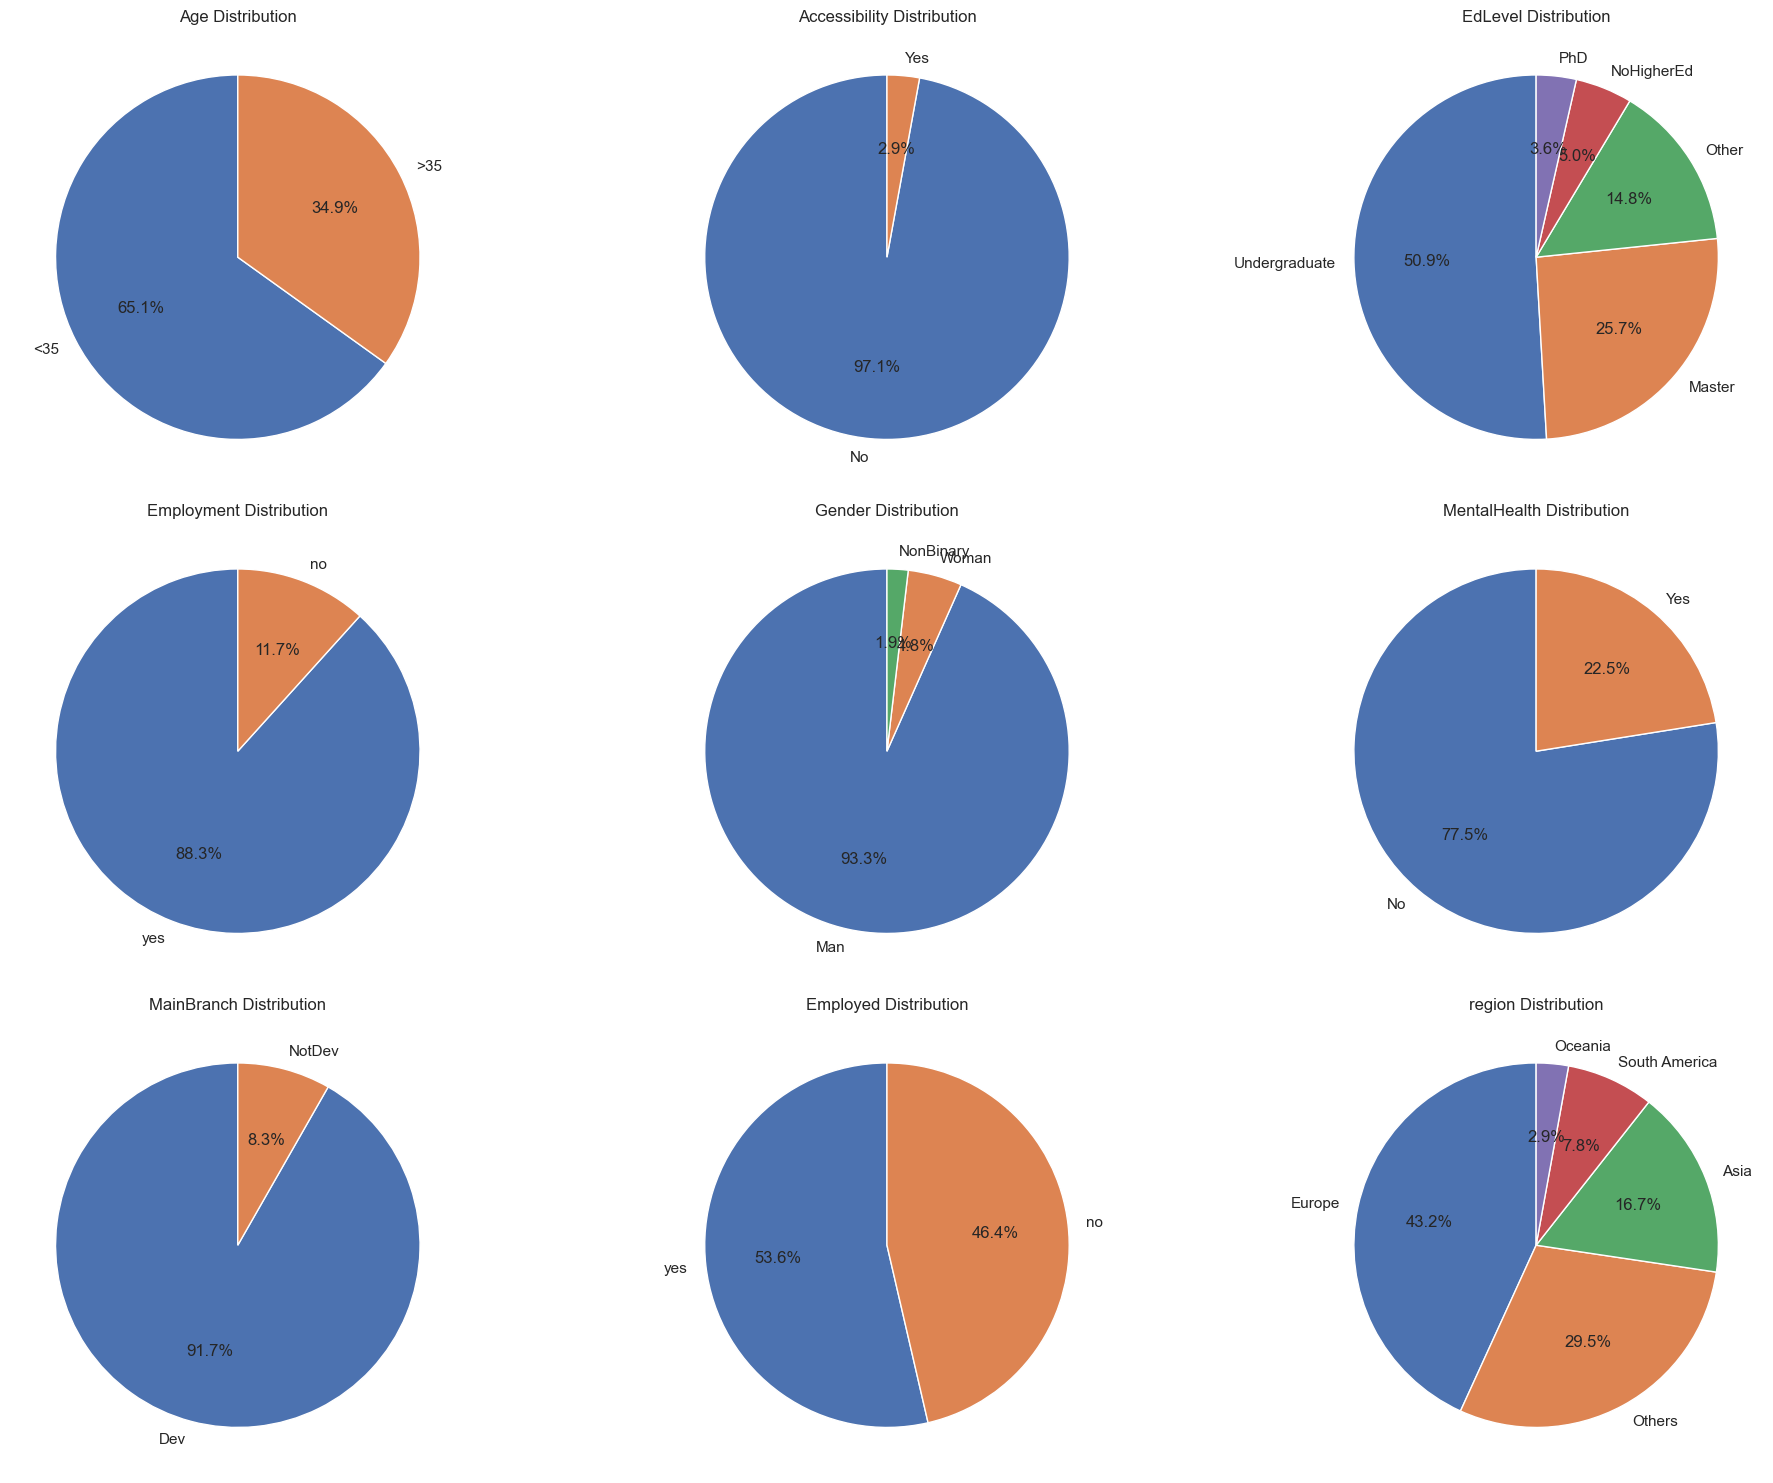

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'Country' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


# Data Preprocessing Part 2

In [23]:
#check the amount of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [24]:
#drop Country column because we dont need it anymore
df.drop(columns = 'Country',inplace = True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,region
0,<35,No,Master,yes,Man,No,Dev,7,4,51552.0,4,no,Europe
1,<35,No,Undergraduate,yes,Man,No,Dev,12,5,46482.0,12,yes,Europe
2,<35,No,Master,yes,Man,No,Dev,15,6,77290.0,7,no,Europe
3,<35,No,Undergraduate,yes,Man,No,Dev,9,6,46135.0,13,no,Others
4,>35,No,PhD,no,Man,No,NotDev,40,30,160932.0,2,no,Asia


# Label Encoding for Object Datatypes

In [25]:
# Loop over each column in the DataFrame wher dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #print the column name and the unique values
    print(f"{col}:{df[col].unique()}")

Age:['<35' '>35']
Accessibility:['No' 'Yes']
EdLevel:['Master' 'Undergraduate' 'PhD' 'Other' 'NoHigherEd']
Employment:['yes' 'no']
Gender:['Man' 'Woman' 'NonBinary']
MentalHealth:['No' 'Yes']
MainBranch:['Dev' 'NotDev']
Employed:['no' 'yes']
region:['Europe' 'Others' 'Asia' 'South America' 'Oceania']


In [26]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is ‘object’
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Age: [0 1]
Accessibility: [0 1]
EdLevel: [0 4 3 2 1]
Employment: [1 0]
Gender: [0 2 1]
MentalHealth: [0 1]
MainBranch: [0 1]
Employed: [0 1]
region: [1 3 0 4 2]


<Axes: >

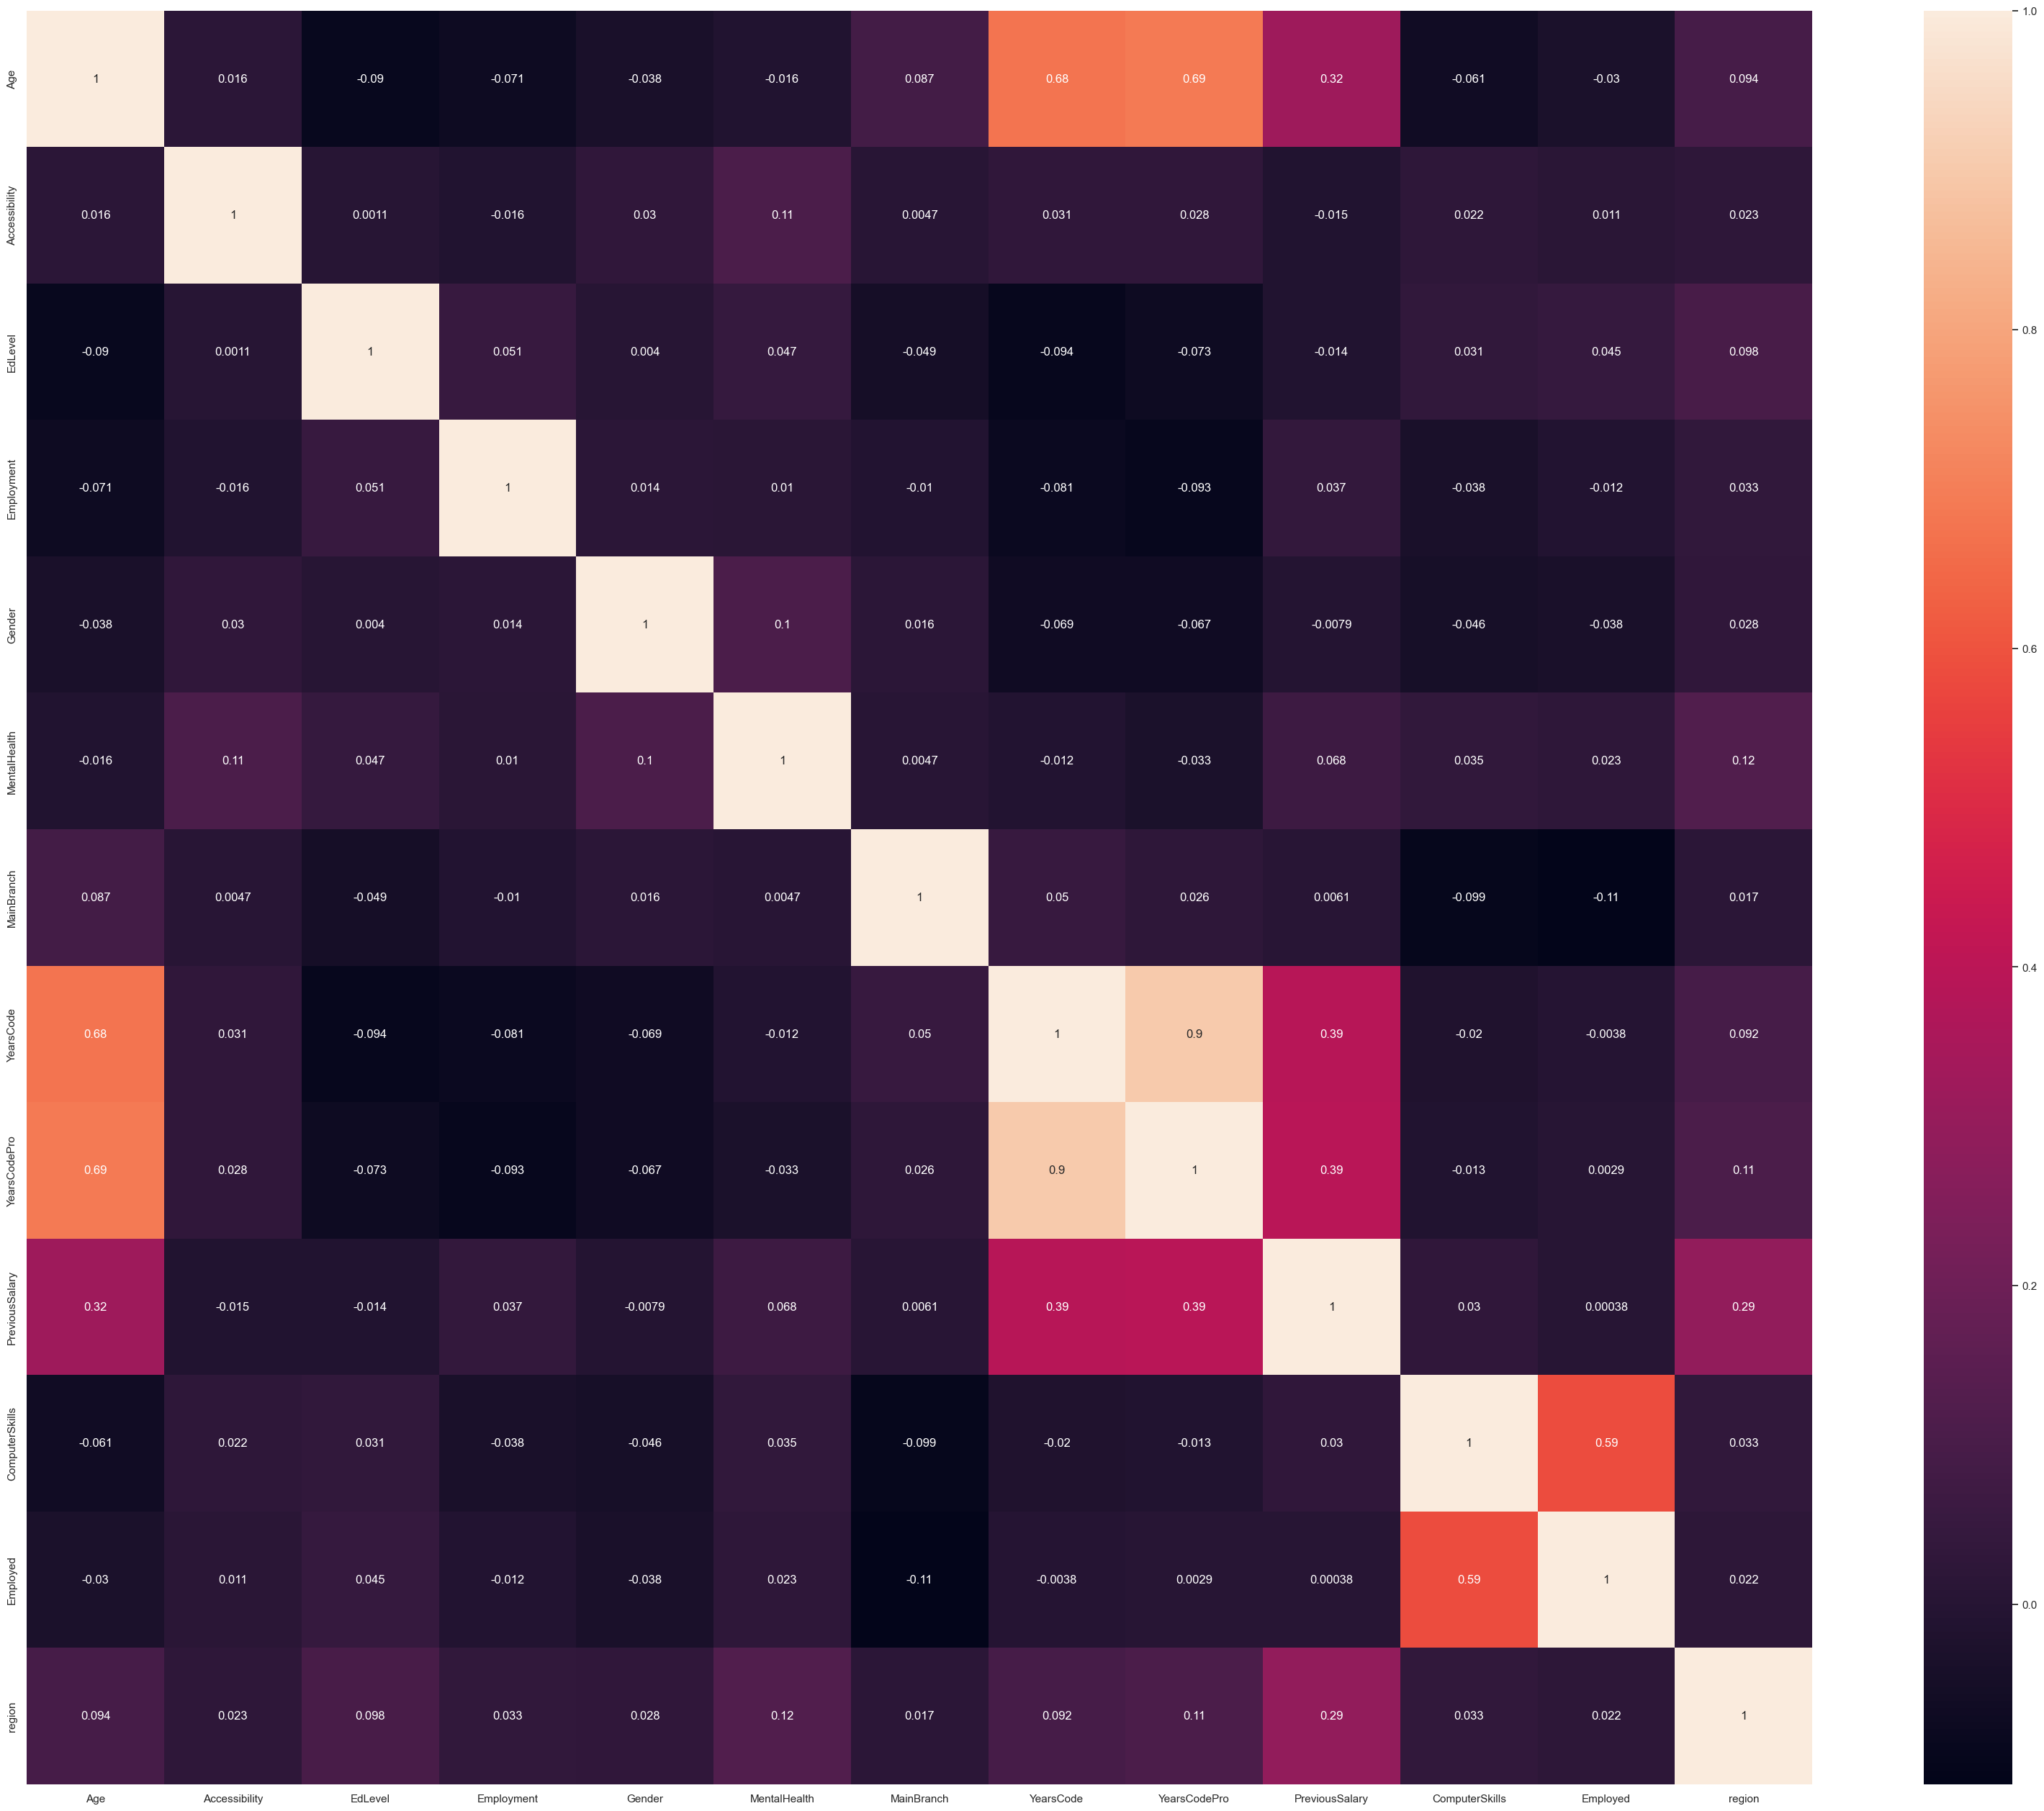

In [27]:
 # Correlation Heatmap


plt.figure(figsize=(40, 32))

sns.heatmap(df.corr(), fmt ='.2g',annot=True)

In [29]:
# Remove YearsCodePro column because it have high correlation with YearsCode column

df.drop(columns = 'YearsCodePro',inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,1
3,0,0,4,1,0,0,0,9,46135.0,13,0,3
4,1,0,3,0,0,0,1,40,160932.0,2,0,0


# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Employed', axis=1)
y = df['Employed']  # Corrected the quotation marks

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Now you can use X_train, X_test, y_train, and y_test for training and testing your machine learning model.


# Remove Outlier From Train Data using Z-Score

In [31]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['YearsCode', 'PreviousSalary', 'ComputerSkills']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [32]:
df.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,1
3,0,0,4,1,0,0,0,9,46135.0,13,0,3
4,1,0,3,0,0,0,1,40,160932.0,2,0,0
5,0,0,0,1,0,0,0,9,38915.0,5,0,1
6,1,0,0,1,0,0,0,26,77831.0,17,1,1
7,0,0,0,1,0,0,1,14,81319.0,4,0,1
8,1,0,4,1,0,0,0,39,68507.0,3,0,1
9,1,0,0,1,0,0,0,20,37752.0,6,0,3


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]  # Corrected the quotation marks
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score

y_pred = dtree.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy Score:", accuracy, "%")


Accuracy Score: 78.11 %


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',f1_score(y_test, y_pred, average='micro'))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test,y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7811202613489416
Precision Score :  0.7811202613489416
Recall Score :  0.7811202613489416
Jaccard Score :  0.6408509687866436
Log Loss :  7.889225433839295


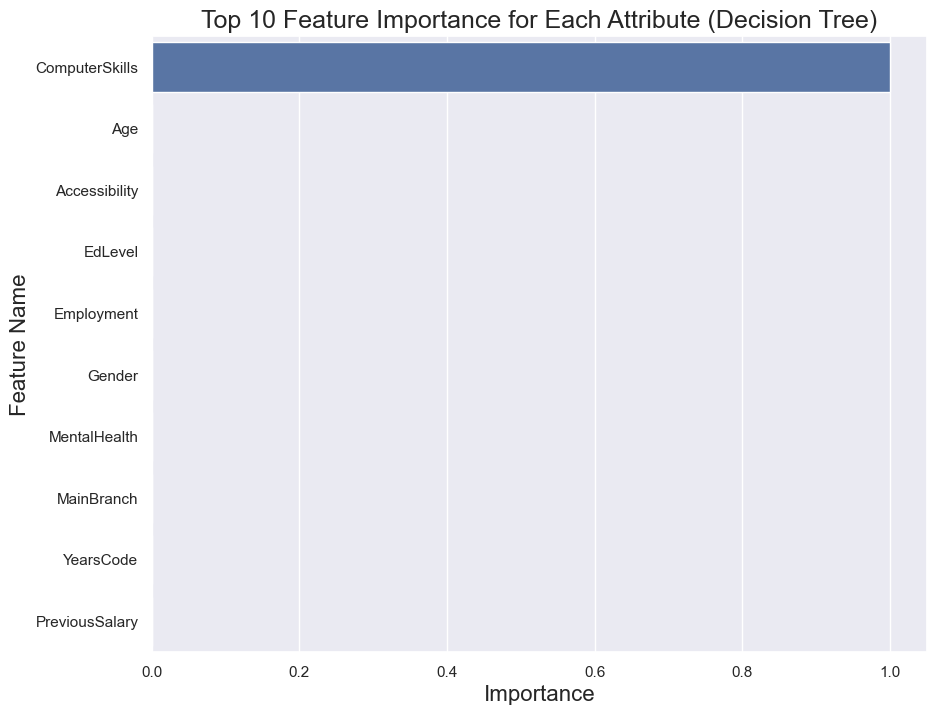

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for feature importances
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

# Sort the DataFrame by importance in descending order
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features
fi2 = fi.head(10)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')

# Set title and labels
plt.title('Top 10 Feature Importance for Each Attribute (Decision Tree)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)

# Show the plot
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


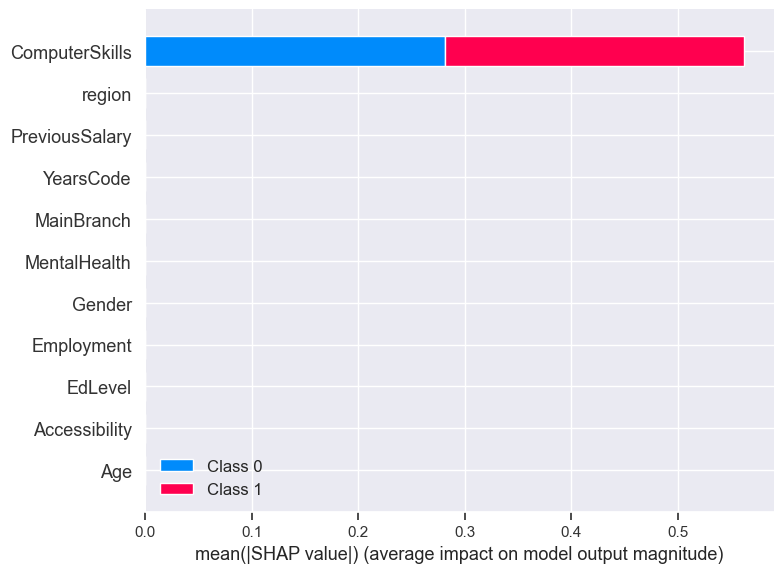

In [38]:
import shap
explainer = shap.TreeExplainer(dtree)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


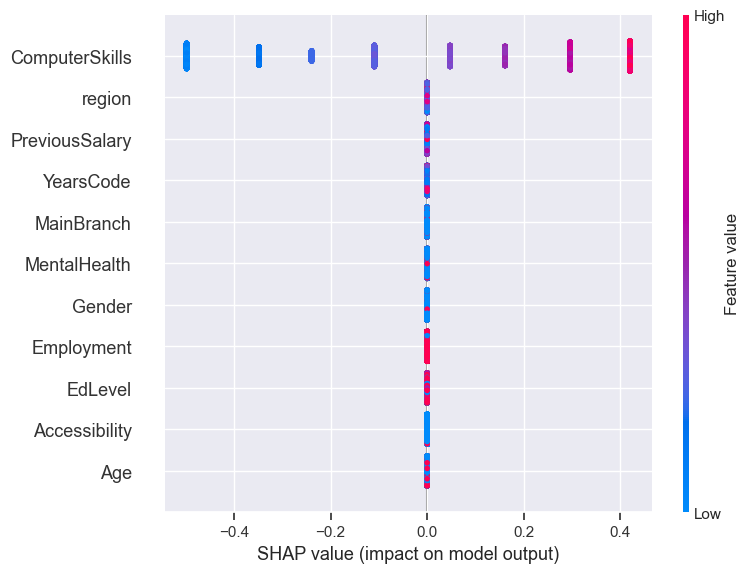

In [39]:
import shap

# Compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns)


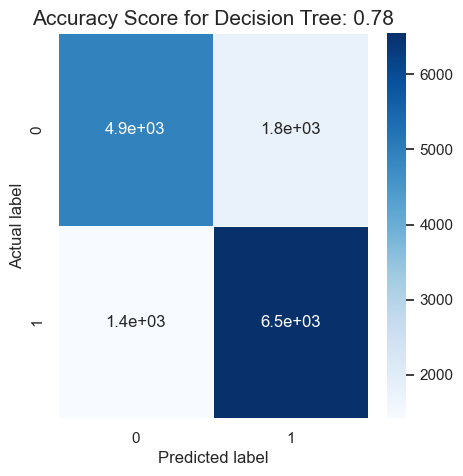

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = "Accuracy Score for Decision Tree: {:.2f}".format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size=15)

plt.show()


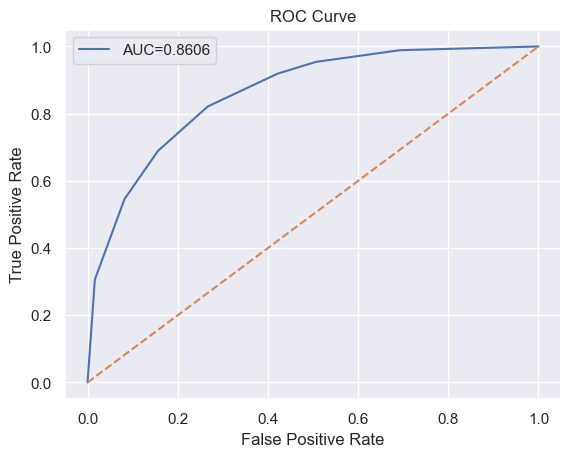

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained and fitted a DecisionTreeClassifier
# and have your X_test and y_test data ready

# Make predictions on the test data
y_pred_proba = dtree.predict_proba(X_test)[:, 1]

# Create a DataFrame to store actual and predicted probabilities
df_actual_predicted = pd.DataFrame({'y_actual': y_test, 'y_pred_proba': y_pred_proba})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [42]:
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,46482.0,12,1,1


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight="balanced")
param_grid = {
    'n_estimators': [100, 200],  # Changed 1e6 to 100 and 200
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],  # Removed extra quotation marks
    'random_state': [0, 42]  # Removed the '@' symbol
}
# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with specific hyperparameters
rfc = RandomForestClassifier(random_state=42, max_depth=5, max_features=None, n_estimators=100)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Now the RandomForestClassifier is trained on your data.


RandomForestClassifier(max_depth=5, max_features=None, random_state=42)

In [47]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy Score:", accuracy, "%")


Accuracy Score: 78.04 %


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Assuming you have defined y_test and y_pred earlier in your code

print('F-1 Score :', f1_score(y_test, y_pred, average='micro'))
print('Precision Score :', precision_score(y_test, y_pred, average='micro'))
print('Recall Score :', recall_score(y_test, y_pred, average="micro"))
print('Jaccard Score :', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss :', log_loss(y_test, y_pred))


F-1 Score : 0.780371605526441
Precision Score : 0.7803716055264411
Recall Score : 0.7803716055264411
Jaccard Score : 0.63984375
Log Loss : 7.916209724813248


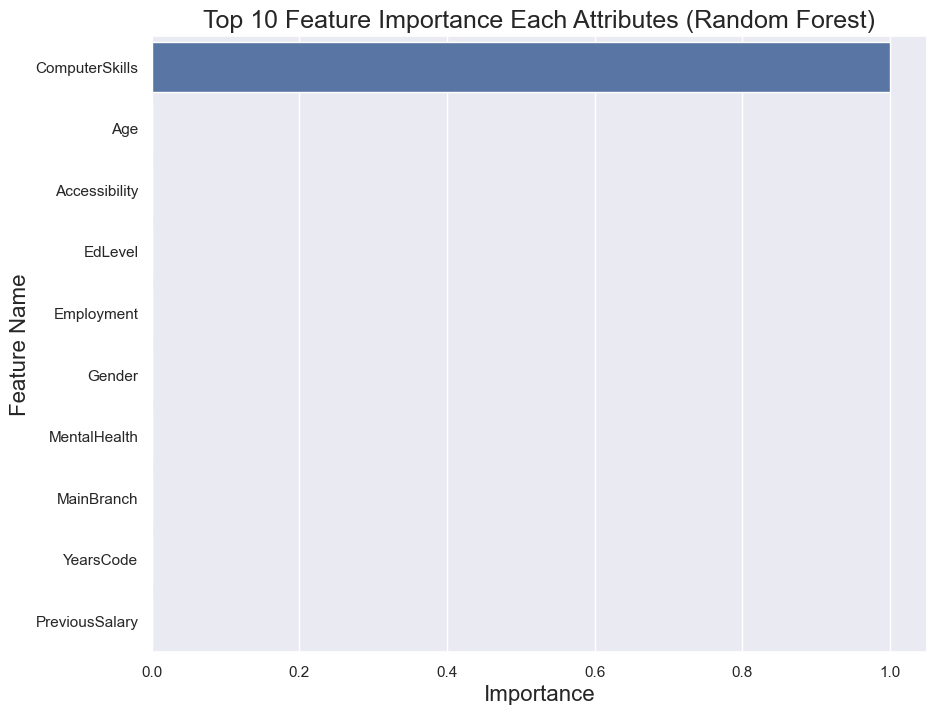

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined imp_df, fi2, and X_train.columns earlier in your code

# Replace the special characters in the column names
imp_df.columns = imp_df.columns.str.replace("“", "").str.replace("”", "")

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)

plt.figure(figsize=(10, 8))

sns.barplot(data=fi2, x='Importance', y='Feature Name')

plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


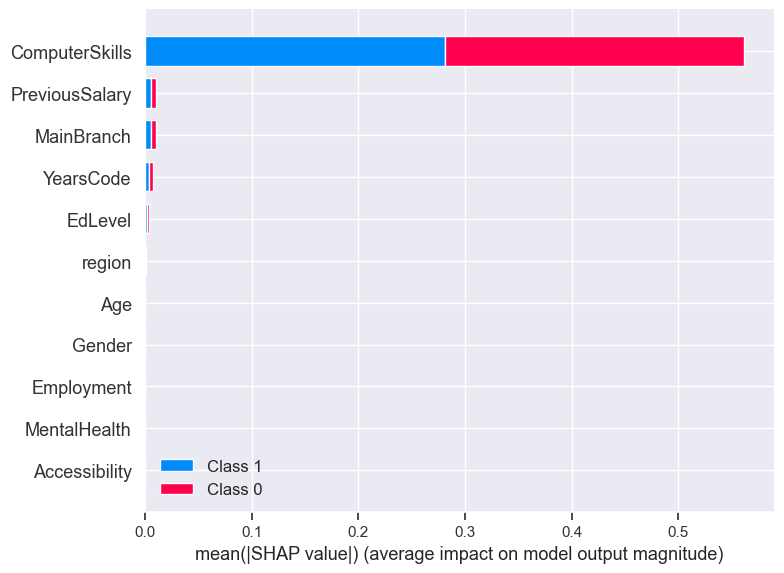

In [50]:
 import shap
explainer = shap.TreeExplainer(rfc)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


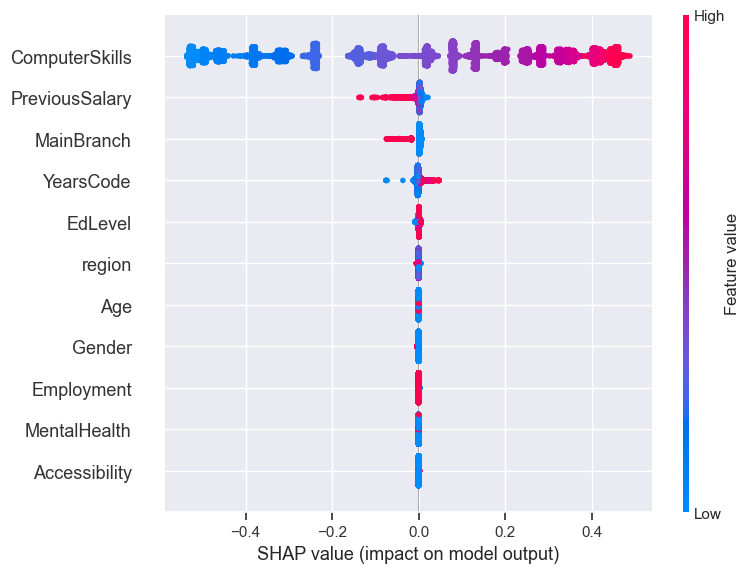

In [51]:
import shap

# Assuming you have defined X_test and rfc earlier in your code

# Compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)


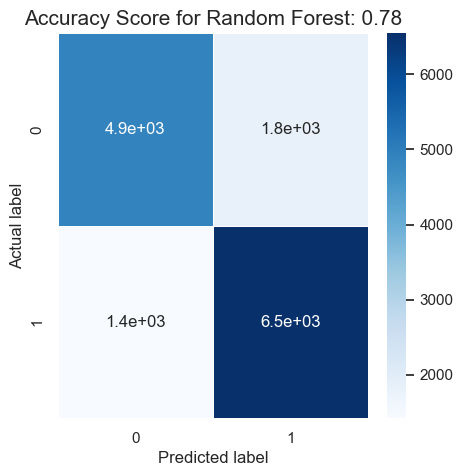

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined y_test and y_pred earlier in your code

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
all_sample_title = "Accuracy Score for Random Forest: {:.2f}".format(accuracy)

# Set the title of the plot
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


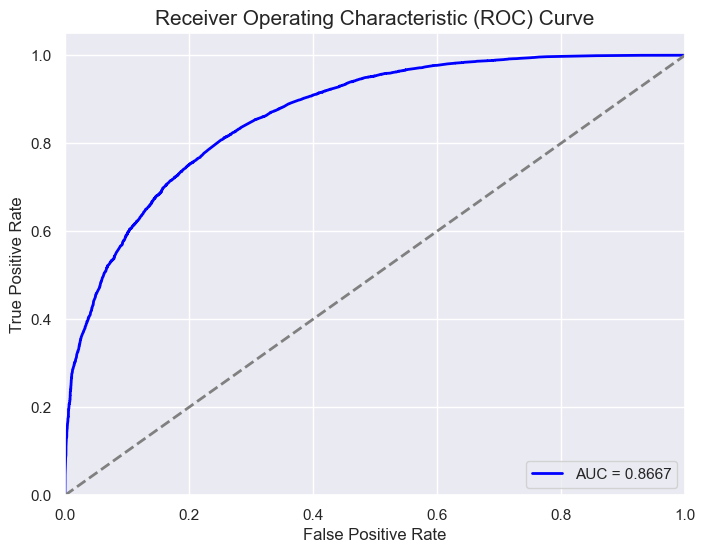

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have defined rfc, X_test, and y_test earlier in your code

# Calculate predicted probabilities for class 1
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Create a DataFrame with actual and predicted values
df_actual_predicted = pd.DataFrame({'y_actual': y_test, 'y_pred_proba': y_pred_proba})

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label="AUC = {:.4f}".format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', size=15)
plt.legend(loc="lower right")

# Show the plot
plt.show()


# XGBoost Classifier

In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],  # Changed '1.9' to '0.9'
    'colsample_bytree': [0.8, 0.9],  # Changed '1.8' to '0.9'
    'gamma': [0, 0.1, 0.2],  # Changed '@' to '0'
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8}


In [55]:
import xgboost as xgb

# Create an instance of the XGBClassifier
xgb_classifier = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.1, learning_rate=0.1)

# Assuming you have your training data X_train and y_train
# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = xgb_classifier.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.23 %


In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Assuming you have y_test and y_pred defined somewhere

print('F-1 Score : ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score : ', precision_score(y_test, y_pred, average='micro'))
print('Recall Score : ', recall_score(y_test, y_pred, average='micro'))

print('Jaccard Score : ', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss : ', log_loss(y_test, y_pred))


F-1 Score :  0.7823453345130335
Precision Score :  0.7823453345130335
Recall Score :  0.7823453345130335
Jaccard Score :  0.6425018165558102
Log Loss :  7.845069321336463


[00:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


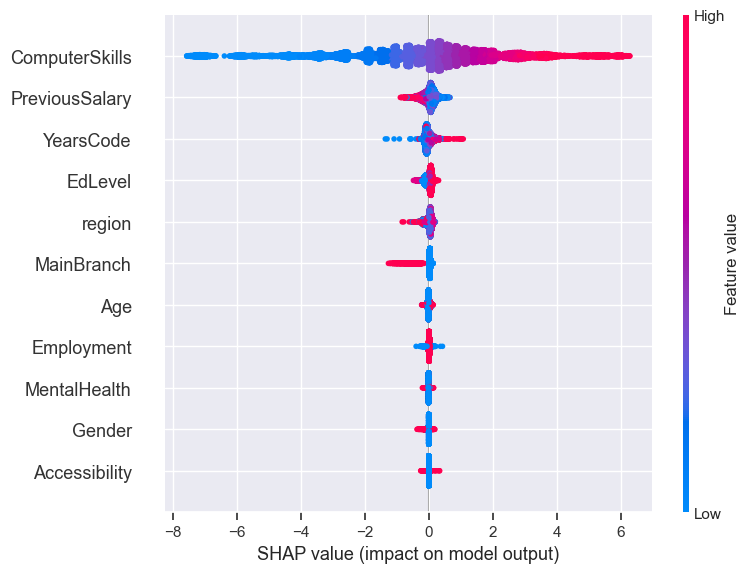

In [58]:
import shap
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

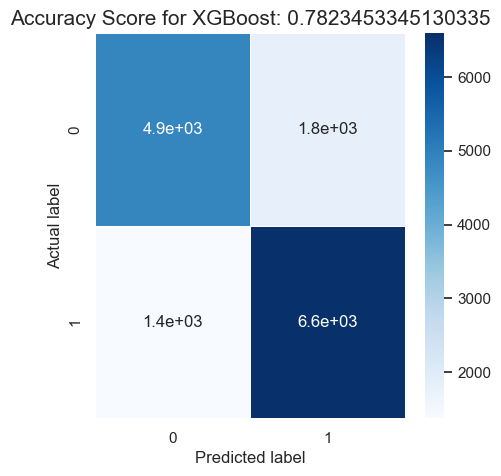

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = "Accuracy Score for XGBoost: {}".format(xgb_classifier.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


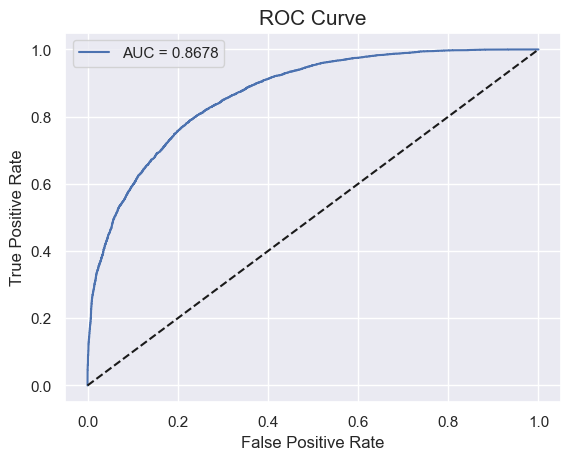

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have y_test and xgb_classifier defined somewhere

y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

df_actual_predicted = pd.DataFrame({'y_actual': y_test, 'y_pred_proba': y_pred_proba})
df_actual_predicted.index = y_test.index

fpr, tpr, _ = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label="AUC = {:.4f}".format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve', size=15)

plt.legend()
plt.show()
